# Proyecto Etapa 2: Estimación de la calidad del agua (KNN vs Árboles de Decisión)

## Análisis del Problema
Se desea construir un modelo de clasificación que permita determinar o estimar la potabilidad del agua a partir de sus propiedades físico-químicas, así como también, identificar cuáles de estas propiedades son las de mayor importancia en dicha clasificación.

Los objetivos que se desean abordar con esta primera etapa del proyecto son:
- Aplicar técnicas de clasificación basadas en árboles de decisión y K-vecinos más cercanos para construir modelos predictivos que permitan estimar la calidad del agua de una zona determinada.

- Determinar cuáles son los factores que más inciden en la contaminación de los cuerpos de agua con base en los datos.

## Recolección de datos

Los datos fueron suministrados por el equipo docente de la Universidad de Los Andes y adaptados de los datos originales [Water Quality](https://www.kaggle.com/datasets/adityakadiwal/water-potability) de Kaggle.

Los campos (columnas), tipos de dato y descripción (Diccionario) con los que se cuentan son:

| **Columna** | **Tipo**   | **Descripción**                                 |
|-------------|------------|-------------------------------------------------|
| pH       | numérico       | El PH es un parámetro importante para evaluar el equilibrio ácido-base del agua. También es el indicador del estado ácido o alcalino del agua. La Organización Mundial de la Salud (OMS) ha recomendado un límite máximo permisible de pH de 6,5 a 8,5. Los rangos de la investigación actual fueron de 6,52 a 6,83, que están en el rango de las normas de la OMS.   |
| Dureza       | numérico       | La dureza está causada principalmente por las sales de calcio y magnesio. Estas sales se disuelven en los depósitos geológicos por los que pasa el agua. La dureza se definió originalmente como la capacidad del agua para precipitar el jabón causado por el Calcio y el Magnesio.   |
| Sólidos       | numérico       | (Sólidos totales disueltos - TDS). El agua tiene la capacidad de disolver una amplia gama de minerales inorgánicos y algunos orgánicos o sales como el potasio, el calcio, el sodio, los bicarbonatos, los cloruros, el magnesio, los sulfatos, etc. Estos minerales producen un sabor no deseado y un color diluido en la apariencia del agua. Este es el parámetro importante para el uso del agua. El agua con un alto valor de TDS indica que el agua está muy mineralizada. El límite deseable de TDS es de 500 mg/l y el límite máximo es de 1000 mg/l, que se prescribe para el consumo.   |
| Cloraminas       | numérico       | El cloro y la cloramina son los principales desinfectantes utilizados en los sistemas públicos de agua. Las cloraminas se forman normalmente cuando se añade amoníaco al cloro para tratar el agua potable. Los niveles de cloro de hasta 4 miligramos por litro (mg/L o 4 partes por millón (ppm)) se consideran seguros en el agua potable.   |
| Sulfatos       | numérico       | Los sulfatos son sustancias naturales que se encuentran en los minerales, el suelo y las rocas. Están presentes en el aire, las aguas subterráneas, las plantas y los alimentos. El principal uso comercial de los sulfatos es la industria química. La concentración de sulfato en el agua de mar es de unos 2.700 miligramos por litro (mg/L). En la mayoría de los suministros de agua dulce oscila entre 3 y 30 mg/L, aunque en algunos lugares geográficos se encuentran concentraciones mucho más altas (1000 mg/L).   |
| Conductividad       | numérico       | El agua pura no es un buen conductor de la corriente eléctrica, más bien es un buen aislante. El aumento de la concentración de iones aumenta la conductividad eléctrica del agua. En general, la cantidad de sólidos disueltos en el agua determina la conductividad eléctrica. La conductividad eléctrica (CE) mide en realidad el proceso iónico de una solución que le permite transmitir la corriente. Según las normas de la OMS, el valor de la CE no debe superar los 400 μS/cm.   |
| Carbono_orgánico       | numérico       | El carbono orgánico total (COT) en las aguas procede de la materia orgánica natural en descomposición, así como de fuentes sintéticas. El COT es una medida de la cantidad total de carbono en compuestos orgánicos en el agua pura.    |
| Trihalometanos       | numérico       | Los Trihalometanos (THM) son sustancias químicas que pueden encontrarse en el agua tratada con cloro. La concentración de THM en el agua potable varía según el nivel de materia orgánica en el agua, la cantidad de cloro necesaria para tratar el agua y la temperatura del agua que se está tratando. Los niveles de THM de hasta 80 ppm se consideran seguros en el agua potable.   |
| Turbidez       | numérico       | La turbidez del agua depende de la cantidad de materia sólida presente en estado de suspensión. Es una medida de las propiedades de emisión de luz del agua y la prueba se utiliza para indicar la calidad de los vertidos con respecto a la materia coloidal. El valor medio de turbidez obtenido para el Campus Wondo Genet (0,98 NTU) es inferior al valor recomendado por la OMS de 5,00 NTU.   |
| Apta       | numérico       | Indica si el agua es segura para el consumo, donde SI significa apta y NO significa no apta.   |



### Importación de librerias

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Herramientas para el tratamiento de datos, Pipelines y busquedad de hiperparámetros
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Árboles de Decisión
from sklearn.tree import DecisionTreeClassifier, plot_tree

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Herramientas para el análisis de resultados
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

Creación del DataFrame original con los datos sin transformar

In [221]:
#Ubicación del dataset
ruta = "Datos_Etapa-2.xlsx"

#Importación del Data Set
data_raw = pd.read_excel(ruta, na_values=['?'])

Visualicemos los primeros cinco registros del DataFrame

In [222]:
data_raw.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,NO
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,NO
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,NO
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,NO
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,NO


### Separación de Datos Train-Test
A continuación se realizará la separación de los datos Train y Test utilizando una proporción de 80%-20% respectivamente.

In [223]:
# Separación de conjuntos de datos Train y Test
Train, Test = train_test_split(data_raw, test_size = 0.2, random_state=77)

## Exploración de los datos

Veamos algunas estadísticas del DataFrame y un resumen de la cantidad de nulos o faltantes por cada campo:

In [224]:
Train.describe()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
count,2233.000000,2620.000000,2620.000000,2620.000000,2005.000000,2620.000000,2620.000000,2488.000000,2620.000000
mean,7.093618,196.841176,21942.195156,7.137160,333.748259,425.441561,14.282737,66.310213,3.965844
std,1.576829,33.191076,8780.067388,1.594267,40.974237,80.908036,3.286234,16.108806,0.787653
min,0.000000,47.430000,320.940000,0.350000,129.000000,232.610000,2.200000,0.740000,1.450000
25%,6.090000,176.857500,15489.237500,6.147500,308.560000,363.837500,12.087500,55.857500,3.440000
50%,7.050000,197.335000,20921.200000,7.130000,333.210000,420.540000,14.220000,66.420000,3.940000
75%,8.070000,217.692500,27332.760000,8.122500,359.410000,481.877500,16.552500,77.322500,4.500000
max,14.000000,317.340000,61227.200000,13.130000,476.540000,753.340000,27.010000,120.030000,6.740000


In [225]:
print(Train.isna().sum(), '\n')
print(Train.isnull().sum())

pH                  387
Dureza                0
Sólidos               0
Cloraminas            0
Sulfatos            615
Conductividad         0
Carbono_orgánico      0
Trihalometanos      132
Turbidez              0
Potabilidad           0
dtype: int64 

pH                  387
Dureza                0
Sólidos               0
Cloraminas            0
Sulfatos            615
Conductividad         0
Carbono_orgánico      0
Trihalometanos      132
Turbidez              0
Potabilidad           0
dtype: int64


Como se puede observar en el resumen anterior, existen campos vacíos para las propiedades de *pH, sulfatos* y *trihalometanos*. Gracias a que todos los campos del conjunto de datos (excepto el de Potabilidad que es el campo objetivo) son númericos, se optará por una imputación de datos explorando la mejor opción con *GridSearchCV*. Esto se realizará en la etapa de **Transformación y Preparación**

In [226]:
Train.duplicated().sum()

0

Como se puede observar, no existen duplicados en el conjunto de entrenamiento.

### Histogramas para cada campo

Resulta útil visualizar los histogramas para cada campo con el fin de analizar sus distribuciones y posibles outlayers:

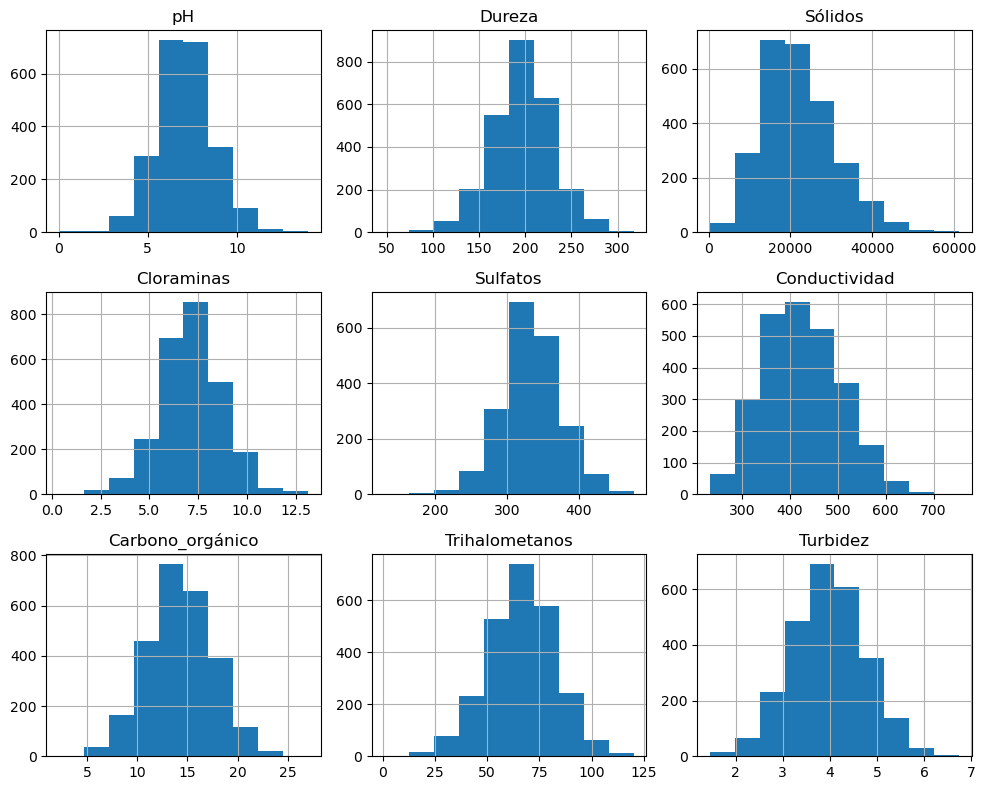

In [227]:
# Creación de histogramas para cada campo no categórico
Train.hist(figsize=(10, 8))
plt.tight_layout()  # Ajustando el espaciado entre los subplots para que no se solapen
plt.show()


Aunque existen algunos valores extremos (posibles outlayers) para las propiedades anteriores, es muy probable que estos datos no sean errores, sino condiciones reales que se presentan durante las mediciones hechas a los cuerpos de agua, ya que se presentan en proporciones coherentes con distribuciones normales, es decir, tienen poca representación de los datos. Por lo anterior, no eliminaremos esos datos y construiremos los modelos tomandolos en cuenta.

Por otro lado, la variable categórica **Potabilidad** deben ser visualizada con un grafico de barras ya que los histogramas son para variables numéricas.

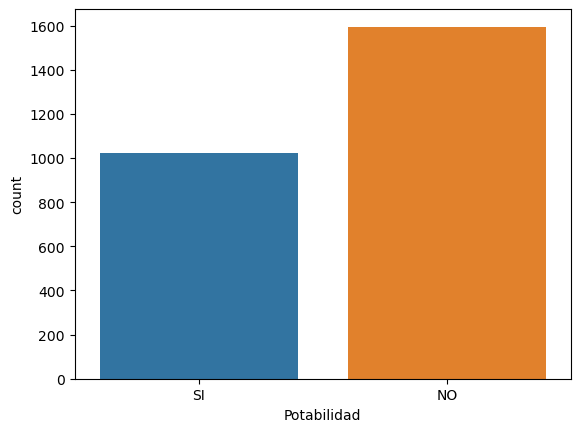

In [228]:
# Histograma para la variable 'season'
sns.countplot(x='Potabilidad', data=Train)
plt.show()

Se observa que la clase 'SI' es aproximadamente el 62.5% de la clase 'NO'. Aunque los Árboles de Decisión suelen ser robustos al desbalance en las clases, no ocurre lo mismo con KNN. Por lo anterior, en la etapa de **Modelado** se utilizará el método ***class_weight='balanced'*** para balancear los pesos de las clases tanto para Árboles de Decisión como para KNN.

## Árboles de Decisión

Primero, Transformaremos, Prepararemos y Modelaremos utilizando el clasificador ***DecisionTreeClassifier***.

### Transformación y Preparación

En esta etapa realizaremos las siguientes operaciones:

1. Creación de dataframes x_train y y_train.
2. Pipeline que contendrá:
    - Imputación de datos faltantes para los campos *pH*, *Sulfatos* y *Trihalometanos*.
    - El modelo a utilizar, en este caso, *DecisionTreeClassifier()*.

#### Dataframes x_train y y_train

In [229]:
x_train = Train.drop('Potabilidad', axis=1)
y_train = Train['Potabilidad']

Verifiquemos que los dataframes anteriores esten construidos correctamente.

In [230]:
x_train.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
3126,6.67,155.71,30610.05,8.17,337.17,425.69,15.10,79.78,4.90
3147,6.26,130.37,9734.68,10.28,320.36,399.35,10.85,43.42,3.93
2844,6.66,182.39,16828.88,7.07,355.90,434.66,16.62,69.41,3.97
1916,8.02,255.26,30854.83,8.76,NaN,442.50,11.09,93.27,5.32
1053,8.92,207.52,13291.92,8.56,357.94,468.54,15.69,107.28,4.08


In [231]:
y_train.head()

3126    SI
3147    SI
2844    SI
1916    SI
1053    NO
Name: Potabilidad, dtype: object

#### Creación de Pipeline

Primero crearemos un objeto de tipo RandomForest() para el modelo a utilizar en el Pipeline. Incluiremos el atributo `class_weight` para ayudar a balancear las clases.

In [232]:
decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

Ahora crearemos un objeto de tipo *SimpleImputer()* sin ningún argumento ya que utilizaremos la grilla de parámetros de *GridSearchCV()* para realizar una busqueda exahustiva del mejor imputador de datos.

In [233]:
imputer = SimpleImputer(strategy='mean')

Ahora crearemos una lista de tuplas que contendrá los pasos del Pipeline.

In [234]:
steps = [
    ("imputer", imputer),
    ("modelDTrees", decision_tree),
]

Finalmente, creamos un objeto de tipo `Pipeline()` con los pasos definidos previamente y lo ajustamos a los datos de entrenamiento para no tener problemas al transformar posteriormente 

In [235]:
pipelineDTree = Pipeline(steps)

### Modelado

Utilizaremos una busqueda exahustiva de hiperparámetros con las siguientes configuraciones:

- Estrategías de Imputación: ['mean', 'median', 'most_frequent']
- Criterios de Pureza: ['gini', 'entropy']
- Profundidades máximas: [4,6,8,10,12]
- Número minimos de muestras antes de dividir cada nodo: [3, 4, 5]

#### Busqueda de hiperparámetros

Crearemos a continuación el objeto la variable *param_grid* que nos permitirá incluir los valores sobre los cuales haremos la busqueda para cada hiperparámetro:

In [236]:
param_grid = {
    # Paso de imputación
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    # Paso de modelado
    'modelDTrees__criterion': ['entropy', 'gini'],
    'modelDTrees__max_depth': [4,6,8,10,12],
    'modelDTrees__min_samples_split': [3, 4, 5]
}

Definimos ahora un objeto KFlod() que nos ayudará a encontrar el mejor desempeño para cada modelo evaluado.

In [237]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

Finalmente, realizaremos una búsqueda exhaustiva de hiperparámetros con la función GridSearchCV y usando como atributos los objetos construidos anterioremente:

In [238]:
modelos_DTrees = GridSearchCV(pipelineDTree, param_grid, cv=kfold, n_jobs=-1)

A continuación entrenamos todos los modelos usando el método fit() con los conjuntos de entrenamiento.

In [239]:
modelos_DTrees.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('modelDTrees',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'imputer__strategy': ['mean', 'median',
                                               'most_frequent'],
                         'modelDTrees__criterion': ['entropy', 'gini'],
                         'modelDTrees__max_depth': [4, 6, 8, 10, 12],
                         'modelDTrees__min_samples_split': [3, 4, 5]})

#### Selección del mejor modelo

Veamos ahora cuál fue el mejor conjunto de hiperparámetros:

In [240]:
print('Mejores hiperparámetros: ', modelos_DTrees.best_params_)

Mejores hiperparámetros:  {'imputer__strategy': 'mean', 'modelDTrees__criterion': 'entropy', 'modelDTrees__max_depth': 4, 'modelDTrees__min_samples_split': 3}


Como se puede apreciar, la mejor estrategía de imputación fue usar la media **mean**, el mejor criterio de pureza fue **entropy**, la profundidad máxima del árbol fue de **10** y la cantidad de muestras minimas para cada partición fue de **3**.

Seleccionamos ahora el mejor modelo:

In [241]:
mejor_modelo_Tree = modelos_DTrees.best_estimator_

#### Evaluación

Para esta última parte usaremos el conjunto de datos de evaluación Test. Separaremos estos datos en x_test y y_test, donde ésta última contendrá la variable objetivo 'Potabilidad', mientras que la primera solo contendrá las variables predictoras.

Sin embargo, necesitamos realizar sobre los datos de Test las mismas transformaciones de imputación que hicimos a sobres datos de entrenamiento:

In [242]:
# Separación de datos en variables predictoras y variable objetivo
x_test = Test.drop('Potabilidad', axis=1)
y_test = Test['Potabilidad']

Como los pasos de procesamiento ya están incluidos dentro del modelo *mejor_modelo*, podemos realizar las predicciones directamente sobre el conjunto de test:

In [243]:
y_pred = mejor_modelo_Tree.predict(x_test)

Ahora utilizaremos la función `confusion_matrix()` para generar un mapa de calor con los valores de la matriz de confusión:

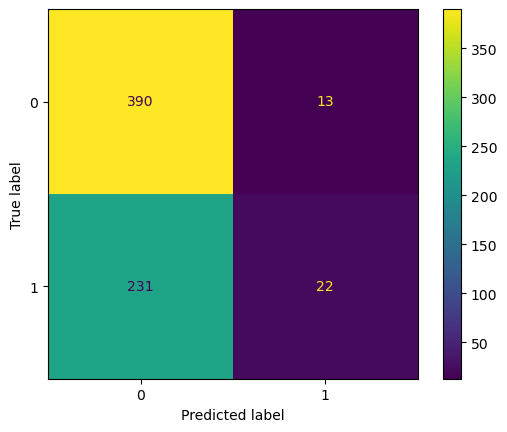

In [244]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

Se observa como el modelo tiene un mejor rendimiento para predecir el agua 'NO' potable que el agua que 'SI' es 'potable'. Veamos ahora las métricas de rendimiento para cada clase:

In [245]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.63      0.97      0.76       403
          SI       0.63      0.09      0.15       253

    accuracy                           0.63       656
   macro avg       0.63      0.53      0.46       656
weighted avg       0.63      0.63      0.53       656



Nótese como la predicción para la clase 'NO' tiene una sensibilidad del 97%, lo que significa que solo el 3% del agua no potable fue clasificada como agua potable. Estoy es un buen indicador para el modelo, sin embargo, note también como la sensibilidad para la clase 'SI' es de tan solo el 9%, es decir, que el 91% de las instancias que representan agua potable fueron clasificadas como no potable, esto es desafortunado ya que casi toda el agua apta para el consumo se estaría clasificando como no apta y por tanto no llegaría a la personas que la necesitan si el modelo fuero puesto en producción como está.

## KNN

A continuación se explorará la clasificación del agua potable con el modelo de K vecinos más cercanos. Para esto, se realizarán transformaciones de datos necesarias para este modelo y el pipeline correspondiente. Posteriormente, se realizará una busqueda exhaustiva de hiperparámetros para encontrar el mejor modelo de KNN para los datos.

### Transformación y Preparación

Se construirá un Pipeline que contendrá:
    
- Imputación de datos faltantes para los campos *pH*, *Sulfatos* y *Trihalometanos*.
- Estandarización de variables numéricas originales: *Dureza, Sólidos, Cloraminas, Sulfatos, Conductividad, Carbono_orgánico, Trihalometanos* y *Turbidez*.
- El modelo a utilizar, en este caso, *KNeighborsClassifier* con *weights='distance'*, lo que ayuda a equilibrar las clases desbalanceadas.

#### Creación de Pipeline

Primero crearemos un objeto de tipo `KNeighborsClassifier()` para el modelo a utilizar en el Pipeline.

In [246]:
KNN = KNeighborsClassifier(weights='distance')

Ahora crearemos un objeto de tipo `StandardScaler()` ya que KNN es sensible a la escala entre diferentes campos. Con esto, corregiremos las diferencias entre escalas para los diferentes atributos.

In [247]:
scaler = StandardScaler()

Ahora crearemos una lista de tuplas que contendrá los pasos del Pipeline.

In [248]:
steps = [
    ("imputer", imputer),
    ("scaler", scaler),
    ("modelKNN", KNN),
]

Finalmente, creamos un objeto de tipo `Pipeline()` con los pasos definidos previamente.

In [249]:
pipelineKNN = Pipeline(steps)

### Modelado

Utilizaremos una busqueda exahustiva de hiperparámetros con las siguientes configuraciones:

- Estrategías de Imputación: ['mean', 'median', 'most_frequent']
- Número de vecinos K: [1, 2, 3, 4, 5]

#### Busqueda de hiperparámetros

Crearemos a continuación el objeto la variable *param_grid* que nos permitirá incluir los valores sobre los cuales haremos la busqueda para cada hiperparámetro:

In [250]:
param_grid = {
    # Paso de imputación
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    # Paso de modelado
    'modelKNN__n_neighbors': [1, 2, 3, 4, 5],
}

Utilizaremos el mismo objeto kfold creado anteriormente. A continuación crearemos el objeto GridSearchCV que nos ayudará con la busqueda de hiperparámetros:

In [251]:
modelos_KNN = GridSearchCV(pipelineKNN, param_grid, cv=kfold, n_jobs=-1)

A continuación entrenamos todos los modelos usando el método fit() con los conjuntos de entrenamiento.

In [252]:
modelos_KNN.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('modelKNN',
                                        KNeighborsClassifier(weights='distance'))]),
             n_jobs=-1,
             param_grid={'imputer__strategy': ['mean', 'median',
                                               'most_frequent'],
                         'modelKNN__n_neighbors': [1, 2, 3, 4, 5]})

#### Selección del mejor modelo

A continuación, imprimiremos el mejor hiperparámetro encontrado para KNN y luego seleccionamos el mejor modelo con dicho hiperparámetro:

In [253]:
print('Mejores hiperparámetros: ', modelos_KNN.best_params_)

Mejores hiperparámetros:  {'imputer__strategy': 'most_frequent', 'modelKNN__n_neighbors': 5}


Como se puede apreciar, la mejor estrategía de imputación cambió respecto al modelo anterior. Esta vez la mejor estrategia de imputación es **most_frequent** . Por otro lado, la cantidad de vecinos más cercanos más óptima fue de **5**.

Seleccionamos ahora el mejor modelo:

In [254]:
mejor_KNN = modelos_KNN.best_estimator_

#### Evaluación

Como los pasos de procesamiento ya están incluidos dentro del modelo *mejor_modelo*, podemos realizar las predicciones directamente sobre el conjunto de test:

In [255]:
y_pred = mejor_KNN.predict(x_test)

Ahora utilizaremos la función `confusion_matrix()` para generar un mapa de calor con los valores de la matriz de confusión:

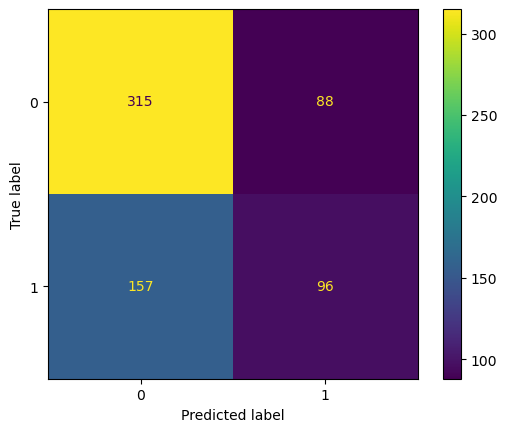

In [256]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

Se observa como el modelo tiene un mejor rendimiento para predecir el agua 'NO' potable que el agua que 'SI' es 'potable'. Veamos ahora las métricas de rendimiento para cada clase:

In [257]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.67      0.78      0.72       403
          SI       0.52      0.38      0.44       253

    accuracy                           0.63       656
   macro avg       0.59      0.58      0.58       656
weighted avg       0.61      0.63      0.61       656



La métrica de sensibilidad para la clase 'SI' mejoró respecto al modelo de Árboles de Decisión, sin embargo, sigue siendo insuficiente. Además, la sensibilidad de la clase 'NO' empeoró, lo que haría que más personas enfermaran por tomar agua no potable pensando que lo es.

## Comparación entre el Modelo KNN y Árboles de Decisión

A continuación se presenta una tabla comparativa con las métricas *precisión*, *sensibilidad* y *f1-score* para ambos modelos estudiados: 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-abmd{background-color:#ecf4ff;border-color:inherit;color:#000000;text-align:left;vertical-align:bottom}
.tg .tg-hxmb{background-color:#ecf4ff;border-color:inherit;color:#000000;text-align:center;vertical-align:middle}
.tg .tg-94n5{background-color:#ecf4ff;border-color:inherit;color:#000000;text-align:left;vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-abmd" rowspan="2">Métrica</th>
    <th class="tg-hxmb" colspan="2">Decision Trees</th>
    <th class="tg-hxmb" colspan="2">KNN (K=5)</th>
  </tr>
  <tr>
    <th class="tg-hxmb">NO</th>
    <th class="tg-hxmb">SI</th>
    <th class="tg-hxmb">NO</th>
    <th class="tg-hxmb">SI</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-94n5">Precisión</td>
    <td class="tg-hxmb">0.63</td>
    <td class="tg-hxmb">0.63</td>
    <td class="tg-hxmb">0.67</td>
    <td class="tg-hxmb">0.52</td>
  </tr>
  <tr>
    <td class="tg-94n5">Sensibilidad</td>
    <td class="tg-hxmb">0.97</td>
    <td class="tg-hxmb">0.09</td>
    <td class="tg-hxmb">0.78</td>
    <td class="tg-hxmb">0.38</td>
  </tr>
  <tr>
    <td class="tg-94n5">F1-Score</td>
    <td class="tg-hxmb">0.76</td>
    <td class="tg-hxmb">0.15</td>
    <td class="tg-hxmb">0.72</td>
    <td class="tg-hxmb">0.44</td>
  </tr>
  <tr>
    <th class="tg-abmd" rowspan="1">Exactitud</th>
    <th class="tg-hxmb" colspan="2">0.63</th>
    <th class="tg-hxmb" colspan="2">0.63</th>
  </tr>
</tbody>
</table>

Como se puede observar, la exactitud fue la misma (63%) para ambos modelos, diferenciándose en el rendimiento para cada clase. Los Árboles de Decisión obtuvieron un mejor rendimiento para la clase 'NO' (63% en precisión y 97% en recall) pero un bajo rendimiento para clase 'SI' (63% en precisión y 9% en recall).

Para el modelo KNN, mejoró el rendimiento para la clase 'SI' (52% en precisión y 38%) pero disminuyó el rendimiento para la clase 'NO' (67% en precisión y 78% en recall), aún así, la mejoría para la clase 'SI' no es suficiente para la implementación del modelo.

## Reglas Árboles de Decisión (Depth = 3)

A continuación se construirá un modelo de Árboles de Decisión con profundidad de 3 y se graficarán las reglas que nos permiten clasificar cuándo el agua no es apta para el consumo.

Para esto, nos basaremos en los resultados anteriores y usaremos una estrategía de imputación por media y un criterio de pureza de entropía.

In [263]:
# Definición del imputador con estrategia 'mean'
imputer = SimpleImputer(strategy='mean')

# Definición del clasificador de árbol de decisión con profundidad máxima 3 y criterio de pureza 'entropy'
decision_tree = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)

# Construcción del pipeline
pipeline = Pipeline([
    ('imputer', imputer),   # Paso de imputación
    ('model', decision_tree)  # Paso de modelado
])

# Entrenamos el modelo
pipeline.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        random_state=42))])

Ahora, graficaremos el árbol haciendo uso del nombre de las características de nuestros datos.

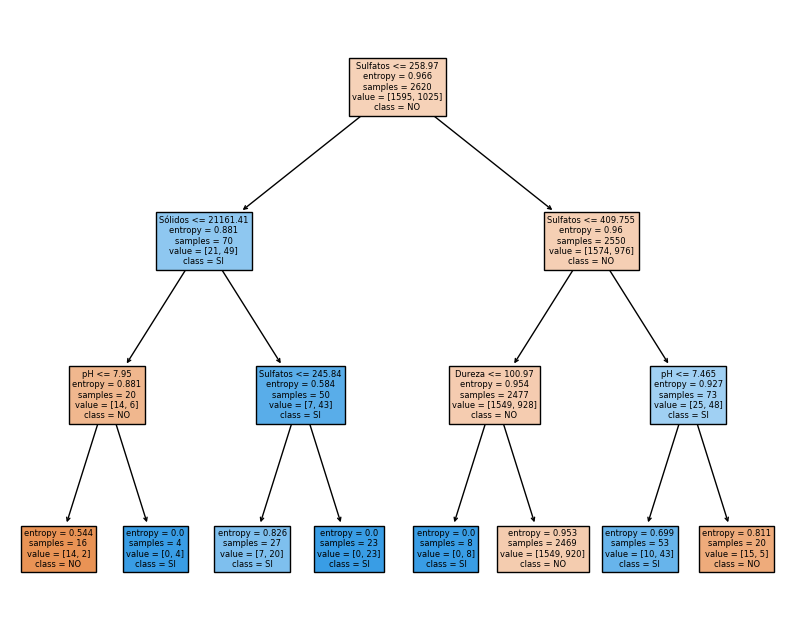

In [265]:
# Obtenenemos las características/columnas de tus datos
feature_names = list(x_train.columns)

# Graficar el árbol de decisión
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, feature_names=feature_names, class_names=decision_tree.classes_, filled=True)
plt.show()

De árbol anterior, se puede concluir que:

1. Si el valor de Sulfatos es menor o igual a 258.97:
    - Si el valor de Sólidos es menor o igual a 21161.41:
        - Si el valor de pH es menor o igual a 7.95, entonces la clase se clasifica como "NO".
2. Si el valor de Sulfatos es mayor a 258.97 y menor o igual a 409.76:
    - Si el valor de Dureza es mayor a 100.97, entonces la clase se clasifica como "NO".
3. Si el valor de Sulfatos es mayor a 409.76:
    - Si el valor de pH es mayor a 7.465, entonces la clase se clasifica como "NO".

## Análisis de Resultados

A continuación, se abordan las respuestas a algunas preguntas de interés sobre el proceso de modelamiento:

**1. ¿Qué puedes decir de los valores de las métricas recall y precisión para cada una de las clases en cada modelo?**

***Modelo Árboles de Decisión:***

Para la clase 'NO' se obtuvo una precisión de 0.63 y un recall de 0.97, lo que significa que de las instancias que fueron clasificadas como 'NO', el 63% fueron clasificadas correctamente, y que, el 97% de las instancias que pertenecen a la clase 'NO' fueron clasificadas como 'NO'. Lo anterior es bastante positivo para el modelo ya que con un recall tan alto se le podría garantizar a las personas que consuman el agua clasificada por este modelo, que solo existe un 3% de chance de beber agua con características nocivas para la salud.

Para la clase 'SI' se obtuvo una precisión de 0.63 y un recall de 0.09, lo que significa que de las instancias que fueron clasificadas como 'SI', el 63% fueron clasificadas correctamente, y que, solo el 9% de las instancias que pertenecen a la clase 'SI' fueron clasificadas como 'SI'. Lo anterior es bastante negativo para el modelo ya que con un recall tan bajo, el 91% del agua potable sería clasificada como no apta para el consumo, lo que ocasionaría un desperdicio muy alto.


***Modelo KNN:***

Para la clase 'NO' se obtuvo una precisión de 0.67 y un recall de 0.78, lo que significa que de las instancias que fueron clasificadas como 'NO', el 67% fueron clasificadas correctamente, y que, el 78% de las instancias que pertenecen a la clase 'NO' fueron clasificadas como 'NO'. Lo anterior es positivo, pero no lo suficiente, para el modelo, ya que existe un 22% de chance de beber agua con características nocivas para la salud, lo cual es un riesgo muy alto tratándose de la salud humana.

Para la clase 'SI' se obtuvo una precisión de 0.52 y un recall de 0.38, lo que significa que de las instancias que fueron clasificadas como 'SI', el 52% fueron clasificadas correctamente, y que, solo el 38% de las instancias que pertenecen a la clase 'SI' fueron clasificadas como 'SI'. Lo anterior es negativo para el modelo ya que con un recall tan bajo, el 62% del agua potable sería clasificada como no apta para el consumo, lo que seguiría ocasionando un desperdicio muy alto.


**1.1. ¿Cuál de estás métricas consideras que es más importante con base en la descripción del problema?**

Considero que la métrica más importante es el recall, primero para la clase 'NO' y luego para la clase 'SI', ya que se debe garantizar primero que no se expondrá a la población a un consumo de agua nociva para la salud, y segundo, que el desperdicio de agua apta para el consumo debe ser el menor posible. En este momento, el KNN es el que arroja el mejor recall para la clase 'SI', pero aún con este modelo, se desperdiciaría el 62% del agua potable.


**2. ¿Consideras que el rendimiento de los modelos es adecuado? Si no es así, ¿Cómo podrían mejorarse los resultados?**

No, como se explicó anteriormente, aunque el modelo Árboles de Decisión tenga un recall de 0.97 para la clase 'NO', la cuál es la más crítica porque protege a la población de agua no potable, el recall para la clase 'SI' desperdicia casi toda el agua que si es potable. Y, el modelo KNN mejora tan solo un poco el recall para la clase 'SI' pero lo baja para la clase 'NO' aumentando el riesgo para la población.

Pienso que es posible mejorar los resultado si primero se realiza un sobre muestreo a los datos de la clase 'SI', antes de entrenar el modelo. Es cierto que se usó el atributo `class_weight='balanced'`, sin embargo, éste método hace uso de un cambio en los pesos de las clases, y puede que no sea la mejor forma de crear un balance para estos datos. Existen métodos el `RandomOverSampler` o `SMOTE` (Synthetic Minority Over-sampling Technique) que pueden crear un mejor balance entre las clases.

Además, también se podría mejorar la imputación de los datos con técnicas que tengan en cuenta todas o algunas características de cada cada instancia e imputar por similaridad y por media, mediana o frecuencia.

**3. ¿Cuáles son las variables más significativas según el mejor modelo basado en árboles de decisión? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.**

Primero, veamos cuáles fueron las variables más significativas según el mejor modelo basado en árboles de decisión:

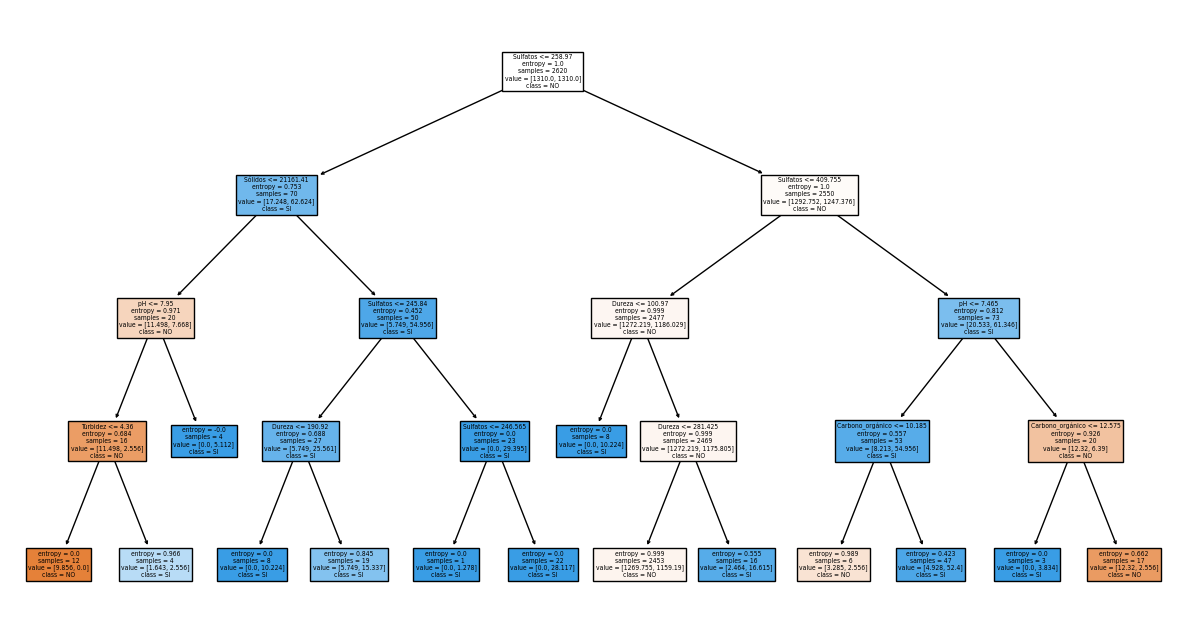

In [274]:
# Primero aislamos el mejor modelo del objeto pipeline
mejor_modelo = mejor_modelo_Tree.named_steps['modelDTrees']

# Graficar el árbol de decisión para el mejor modelo encontrado
plt.figure(figsize=(15, 8))
plot_tree(mejor_modelo, feature_names=feature_names, class_names=mejor_modelo.classes_, filled=True)
plt.show()

Se puede ver que las variables más significativas para la clasificación con el mejor modelo de árboles de decisión son en su respectivo orden:
1. Sulfatos
2. Sólidos
3. Ph
4. Dureza

Lo anterior, podría indicar que podríamos realizar un selección de características antes de construir el modelo, eliminando aquellas que tienen menos significancia en la clasificación y luego, observar si esto incrementa las métricas para ambas clases.

**4. Si los dos modelos proporcionan resultados similares en cuanto a las métricas de rendimiento ¿Cuál seleccionarías tomando en cuenta el contexto del problema?**

Seleccionaría el modelo de Árboles de Decisión ya que, no solo se obtuvieron mejores métricas para la clase más crítica (la clase 'NO'), sino que ofrece una mayor explicabilidad de las clasificaciones hechas, lo cuál lleva a un mejor conocimiento sobre las variables que se deben tener en cuenta al momento de estudiar la potabilidad del agua, y permitiría también crear campañas de conscientización sobre la contaminación del agua en poblaciones generales haciendo uso de las características más importantes para la clasificación.